In [1]:
import pandas as pd # data frame library
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
import numpy

In [2]:
df = pd.read_csv('heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df = df.rename({'DEATH_EVENT':'death'},axis=1)

In [6]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
df.to_csv('new.csv') #to save/download your current csv file in your device

In [8]:
df.death.value_counts()

0    203
1     96
Name: death, dtype: int64

<AxesSubplot:xlabel='count', ylabel='death'>

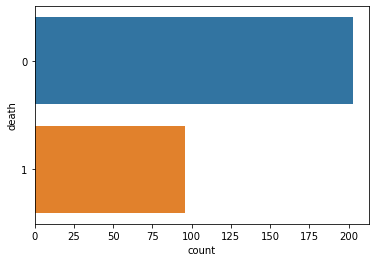

In [9]:
sns.countplot(y='death',data=df)

<AxesSubplot:xlabel='death', ylabel='count'>

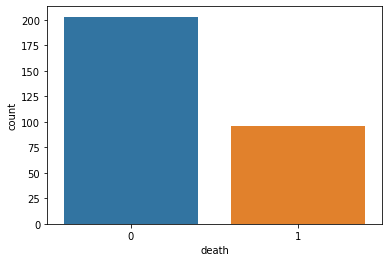

In [10]:
sns.countplot(x='death',data=df)

(<AxesSubplot:xlabel='diabetes', ylabel='count'>,)

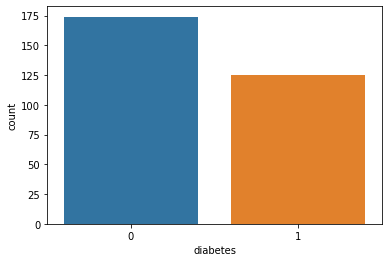

In [11]:
sns.countplot(x='diabetes', data=df) , #='death')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

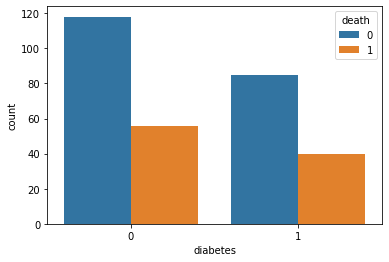

In [12]:
sns.countplot(x='diabetes', data=df, hue='death')

In [13]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

<AxesSubplot:xlabel='anaemia', ylabel='count'>

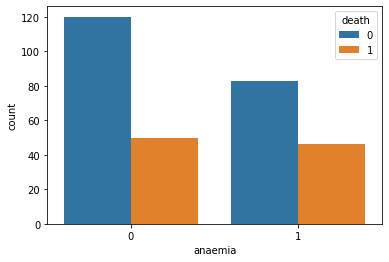

In [14]:
sns.countplot(x='anaemia', data=df, hue='death')

In [15]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

<AxesSubplot:xlabel='anaemia', ylabel='count'>

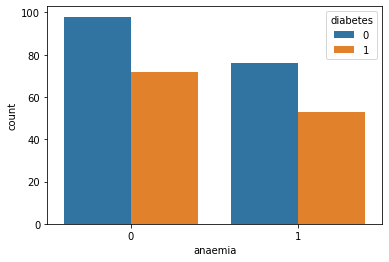

In [16]:
sns.countplot(x='anaemia', data=df, hue='diabetes')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

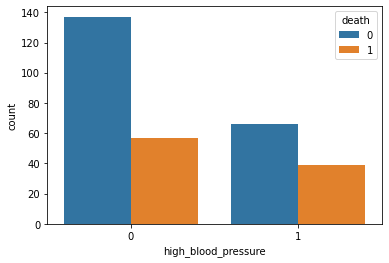

In [17]:
sns.countplot(x='high_blood_pressure', data=df, hue='death')

In [18]:
x = df.drop('death',axis=1)

In [19]:
y = df['death']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70,random_state=42)

In [22]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [23]:
ytest.shape

(90,)

In [24]:
xtest.shape

(90, 12)

# Apply Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier()

In [27]:
dt.fit(xtrain,ytrain) #train the model with 70% of data from dataset

DecisionTreeClassifier()

In [28]:
pred = dt.predict(xtest) # pred is corrsponding to ytest

In [29]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [30]:
pred # Predicted value of Y

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [31]:
import numpy as np
np.array(ytest) # Actual Value of Y

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [32]:
dt.score(xtest,ytest)

0.6888888888888889

# Evaluate the ML model

In [33]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [34]:
classification_report(ytest,pred) 

'              precision    recall  f1-score   support\n\n           0       0.71      0.79      0.75        53\n           1       0.65      0.54      0.59        37\n\n    accuracy                           0.69        90\n   macro avg       0.68      0.67      0.67        90\nweighted avg       0.68      0.69      0.68        90\n'

In [35]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        53
           1       0.65      0.54      0.59        37

    accuracy                           0.69        90
   macro avg       0.68      0.67      0.67        90
weighted avg       0.68      0.69      0.68        90



In [36]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [37]:
test_confusion_matrix

array([[42, 11],
       [17, 20]], dtype=int64)

<AxesSubplot:>

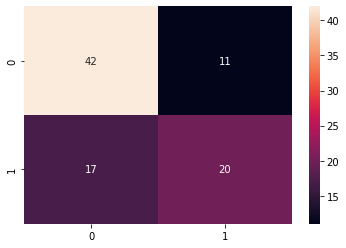

In [38]:
sns.heatmap(test_confusion_matrix, annot=True)

In [39]:
tp, fn, fp, tn = confusion_matrix(ytest,pred).reshape(-1)

In [40]:
dt.score(xtest,ytest)

0.6888888888888889

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier() # default parameters

In [43]:
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [44]:
clf.score(xtest, ytest)

0.7888888888888889

# Hyper Parameter Tuning

In [45]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.RandomizedSearchCV.html

In [46]:
#https://scikit-learn.org/stable/datasets/toy_dataset.html
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
#https://scikit-learn.org/stable/datasets/real_world.html

In [47]:
trees = np.random.randint(25,200,25)

In [48]:
trees

array([ 93, 118,  48,  30, 168,  28, 186, 103, 106, 187,  57, 157, 150,
       123, 168,  74,  75, 196, 102, 120, 197,  51, 169,  59,  60])

In [49]:
criterion = ['gini','entropy']
max_depth = np.random.randint(1,15,20)
min_samples_split = [2,3,4]
max_features = ['sqrt', 'log2']

In [50]:
#grids
ids = {
    'n_estimators' : trees,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features
} 

In [51]:
print(ids)

{'n_estimators': array([ 93, 118,  48,  30, 168,  28, 186, 103, 106, 187,  57, 157, 150,
       123, 168,  74,  75, 196, 102, 120, 197,  51, 169,  59,  60]), 'criterion': ['gini', 'entropy'], 'max_depth': array([ 2, 10,  5, 12,  1,  6,  3, 13, 14, 11, 10,  3,  2,  4,  9, 14, 13,
        8, 12, 11]), 'min_samples_split': [2, 3, 4], 'max_features': ['sqrt', 'log2']}


In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
rcv = RandomizedSearchCV(clf , ids, n_iter = 200, cv=3)

In [54]:

rcv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2, 10,  5, 12,  1,  6,  3, 13, 14, 11, 10,  3,  2,  4,  9, 14, 13,
        8, 12, 11]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([ 93, 118,  48,  30, 168,  28, 186, 103, 106, 187,  57, 157, 150,
       123, 168,  74,  75, 196, 102, 120, 197,  51, 169,  59,  60])})

In [55]:
rcv.cv_results_

{'mean_fit_time': array([0.09486477, 0.14767504, 0.22717222, 0.22650337, 0.08216039,
        0.05834532, 0.07527733, 0.18152269, 0.12657356, 0.11703571,
        0.19270356, 0.16712093, 0.1091253 , 0.08669376, 0.15420373,
        0.15267293, 0.15553633, 0.20819354, 0.19517851, 0.24685446,
        0.23764094, 0.20877655, 0.12014397, 0.10662675, 0.13266087,
        0.14365101, 0.26099912, 0.24094399, 0.07899515, 0.24698273,
        0.05421034, 0.10014462, 0.13134074, 0.04804007, 0.11794051,
        0.26402108, 0.22353387, 0.12995815, 0.25037241, 0.26036755,
        0.15210088, 0.33910632, 0.10532872, 0.32117828, 0.08783372,
        0.19204847, 0.12685847, 0.0461661 , 0.17289964, 0.29275505,
        0.15124321, 0.28860847, 0.04991802, 0.18633095, 0.09575168,
        0.15182559, 0.10021965, 0.0779171 , 0.30547293, 0.09515905,
        0.04172206, 0.18480221, 0.04833746, 0.30411967, 0.04093838,
        0.12968413, 0.16052095, 0.15030503, 0.31857141, 0.08283202,
        0.11184613, 0.20169751,

In [56]:
cv_result = pd.DataFrame(rcv.cv_results_)

In [57]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.094865,0.035028,0.008723,0.000879,51,4,log2,12,entropy,"{'n_estimators': 51, 'min_samples_split': 4, '...",0.828571,0.928571,0.840580,0.865908,0.044580,95
1,0.147675,0.006085,0.015702,0.003768,120,3,log2,13,gini,"{'n_estimators': 120, 'min_samples_split': 3, ...",0.800000,0.928571,0.840580,0.856384,0.053665,143
2,0.227172,0.041691,0.016838,0.000613,169,4,log2,13,entropy,"{'n_estimators': 169, 'min_samples_split': 4, ...",0.814286,0.942857,0.855072,0.870738,0.053645,43
3,0.226503,0.041170,0.013882,0.004764,150,3,log2,13,entropy,"{'n_estimators': 150, 'min_samples_split': 3, ...",0.800000,0.957143,0.855072,0.870738,0.065103,43
4,0.082160,0.008611,0.007271,0.003503,59,3,log2,3,entropy,"{'n_estimators': 59, 'min_samples_split': 3, '...",0.828571,0.942857,0.811594,0.861008,0.058290,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.262409,0.006370,0.022653,0.001833,150,2,log2,1,entropy,"{'n_estimators': 150, 'min_samples_split': 2, ...",0.742857,0.757143,0.782609,0.760870,0.016441,193
196,0.319568,0.028362,0.026600,0.003535,168,4,log2,4,gini,"{'n_estimators': 168, 'min_samples_split': 4, ...",0.814286,0.942857,0.840580,0.865908,0.055460,95
197,0.315902,0.003980,0.025847,0.002454,168,2,log2,10,gini,"{'n_estimators': 168, 'min_samples_split': 2, ...",0.800000,0.914286,0.840580,0.851622,0.047306,152
198,0.106559,0.004792,0.009935,0.003978,48,4,sqrt,10,gini,"{'n_estimators': 48, 'min_samples_split': 4, '...",0.814286,0.914286,0.840580,0.856384,0.042327,143


In [58]:
rcv.best_score_

0.8850931677018634

In [59]:
rcv.best_params_

{'n_estimators': 28,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [60]:
clf2 = RandomForestClassifier(n_estimators= 178, min_samples_split= 2, max_features= 'sqrt', max_depth= 13, criterion = 'entropy')

In [61]:
print(clf2)

RandomForestClassifier(criterion='entropy', max_depth=13, max_features='sqrt',
                       n_estimators=178)


In [62]:
rcv.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=4,
                       n_estimators=28)

In [63]:
clf3 = rcv.best_estimator_

In [64]:
clf3

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=4,
                       n_estimators=28)

In [65]:
clf3.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=4,
                       n_estimators=28)

In [66]:
clf3.score(xtest,ytest)

0.7555555555555555

# Grid Search CV

In [67]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
gcv = GridSearchCV(clf , ids)

In [70]:
gcv.fit(xtrain, ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2, 10,  5, 12,  1,  6,  3, 13, 14, 11, 10,  3,  2,  4,  9, 14, 13,
        8, 12, 11]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([ 93, 118,  48,  30, 168,  28, 186, 103, 106, 187,  57, 157, 150,
       123, 168,  74,  75, 196, 102, 120, 197,  51, 169,  59,  60])})

In [71]:
gcv.cv_results_

{'mean_fit_time': array([0.31844506, 0.44012632, 0.14587312, ..., 0.27294135, 0.09413681,
        0.10281086]),
 'std_fit_time': array([5.22135842e-02, 8.65190264e-02, 1.68387354e-02, ...,
        7.57837080e-03, 3.13626931e-06, 7.00061539e-03]),
 'mean_score_time': array([0.03038144, 0.04790478, 0.01419926, ..., 0.02500048, 0.00624948,
        0.00702877]),
 'std_score_time': array([0.00658617, 0.03095612, 0.0032723 , ..., 0.0076529 , 0.00765401,
        0.00696694]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 2, 2, ..., 11, 11, 11],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', ..., 'log2', 'log2', 'log2'],
  

In [72]:
result = pd.DataFrame(gcv.cv_results_)

In [73]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.318445,0.052214,0.030381,0.006586,gini,2,sqrt,2,93,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.761905,0.880952,0.880952,0.809524,0.878049,0.842276,0.048587,5228
1,0.440126,0.086519,0.047905,0.030956,gini,2,sqrt,2,118,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.785714,0.880952,0.928571,0.785714,0.829268,0.842044,0.055696,5292
2,0.145873,0.016839,0.014199,0.003272,gini,2,sqrt,2,48,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.690476,0.880952,0.904762,0.785714,0.804878,0.813357,0.075973,5667
3,0.075338,0.006555,0.008416,0.000762,gini,2,sqrt,2,30,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.714286,0.833333,0.880952,0.809524,0.853659,0.818351,0.057092,5623
4,0.369619,0.067739,0.029578,0.004379,gini,2,sqrt,2,168,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.714286,0.880952,0.833333,0.809524,0.853659,0.818351,0.057092,5623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.316927,0.015217,0.025069,0.007730,entropy,11,log2,4,197,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.761905,0.904762,0.952381,0.785714,0.926829,0.866318,0.077389,2278
5996,0.091122,0.006246,0.003117,0.006234,entropy,11,log2,4,51,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.785714,0.904762,0.952381,0.809524,0.926829,0.875842,0.066054,168
5997,0.272941,0.007578,0.025000,0.007653,entropy,11,log2,4,169,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.785714,0.904762,0.952381,0.785714,0.926829,0.871080,0.071312,558
5998,0.094137,0.000003,0.006249,0.007654,entropy,11,log2,4,59,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.785714,0.904762,0.952381,0.785714,0.902439,0.866202,0.068093,2686


In [74]:
gcv.best_score_

0.8901277584204415

In [75]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 30}

In [76]:
clf4= gcv.best_estimator_

In [77]:
clf4

RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=30)

In [79]:
clf4.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=30)

In [80]:
clf4.score(xtest,ytest)

0.7777777777777778